# 2. 저장한 CSV 파일을 기반으로 데이터 시각화
- 기간 : (25-07-01 ~ 25-09-30)

In [1]:
# 0. 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

print("Google Drive 마운트가 완료되었습니다.")

Mounted at /content/drive
Google Drive 마운트가 완료되었습니다.


In [2]:
# 1. Colab에 한글 폰트(나눔) 설치
!sudo apt-get install -y fonts-nanum*
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 41 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. 런타임에 한글 폰트 설정
try :
  plt.rc('font', family='NanumBarunGothic')

  # (선택) 마이너스 기호 깨짐 방지
  plt.rcParams['axes.unicode_minus'] = False
  print("한글 폰트(NanumBarunGothic) 설정이 완료되었습니다.")
except :
  print('폰트 설정 실패')

한글 폰트(NanumBarunGothic) 설정이 완료되었습니다.


In [4]:
# 3. 데이터 로드
dir = '/content/drive/MyDrive/D-up_Fest_compass/중간발표 코랩/data/foreign_visitors_3months.csv'
try:
    foreign_data = pd.read_csv(dir)
    print(f"데이터 로드 성공 (원본 크기: {foreign_data.shape})")
except FileNotFoundError:
    print("❌ [에러] 'foreign_visitors_3months.csv' 파일을 찾을 수 없습니다.")
    print("   -> 1단계(데이터 수집)가 정상적으로 완료되었는지 확인하세요.")

데이터 로드 성공 (원본 크기: (22640, 4))


### 2.1. 서울시 외국인 방문객수 바 차트



서울시 데이터 필터링 성공 (서울시 데이터 크기: (2175, 4))


/tmp/ipython-input-4170753035.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipython-input-4170753035.py:49: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 레이아웃 최적화
/tmp/ipython-input-4170753035.py:49: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 레이아웃 최적화
/tmp/ipython-input-4170753035.py:49: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 레이아웃 최적화
/tmp/ipython-input-4170753035.py:49: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 레이아웃 최적화
/tmp/ipython-input-4170753035.py:49: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layou

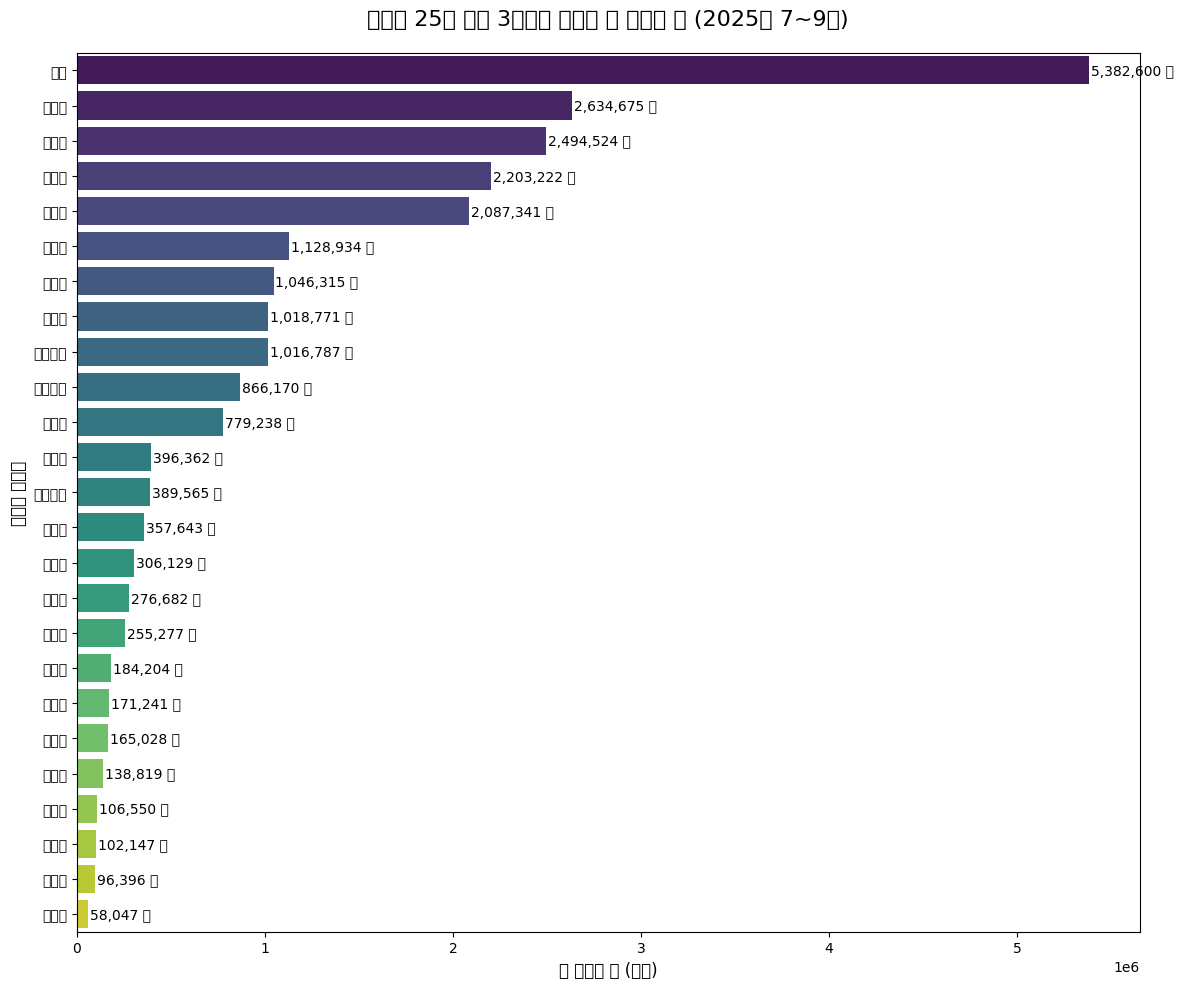


[상위 5개 구 방문자 수 합계]
  district_name  visitor_count
0            중구     5382599.98
1           종로구     2634675.29
2           마포구     2494523.67
3           강남구     2203222.23
4           용산구     2087341.48


In [5]:
# 4. 서울특별시 데이터만 필터링
# (AI 원칙 2: 기본 원리 이해)
# 'district_code'는 정수(int)입니다. 서울시의 지역 코드는 '11xxx'로 시작합니다.
# 이를 문자열로 변환하여 '11'로 시작하는 데이터만 필터링합니다.
foreign_data['district_code'] = foreign_data['district_code'].astype(str)
foreign_data_seoul = foreign_data[foreign_data['district_code'].str.startswith('11')].copy()

if foreign_data_seoul.empty:
    print("❌ [에러] 원본 데이터에 서울시('11'로 시작) 데이터가 없습니다.")
else:
    print(f"서울시 데이터 필터링 성공 (서울시 데이터 크기: {foreign_data_seoul.shape})")

    # 5. 서울시 25개 구별로 '총' 방문자 수 합산 및 정렬
    # (AI 원칙 2: 기본 원리 이해)
    # 'groupby'를 사용해 'district_name'(구 이름)으로 그룹화합니다.
    # 'sum()'을 사용해 3개월간의 'visitor_count'를 모두 합산합니다.
    # 'sort_values'로 가장 많이 방문한 구가 맨 위에 오도록 정렬합니다.
    foreign_data_seoul_agg = foreign_data_seoul.groupby('district_name')['visitor_count'].sum().sort_values(ascending=False).reset_index()

    # 6. 바 차트(Bar Chart) 시각화
    plt.figure(figsize=(12, 10)) # 차트 크기 지정 (세로로 길게)

    # (AI 원칙 3: 과정 요구)
    # Seaborn의 barplot을 사용합니다.
    # 25개 구 이름을 모두 보여주기 위해 세로(y축)에 'district_name'을,
    # 방문자 수를 가로(x축)에 'visitor_count'를 배치하는 것이 가독성이 좋습니다.
    barplot = sns.barplot(
        data=foreign_data_seoul_agg,
        x='visitor_count',
        y='district_name',
        palette='viridis' # 시각적 구분을 위한 색상 팔레트
    )

    # 7. 차트 제목 및 레이블 설정
    plt.title('서울시 25개 구별 3개월간 외국인 총 방문자 수 (2025년 7~9월)', fontsize=16, pad=20)
    plt.xlabel('총 방문자 수 (합계)', fontsize=12)
    plt.ylabel('서울시 자치구', fontsize=12)

    # (선택) 각 막대(bar) 위에 정확한 수치(합계) 표시
    for p in barplot.patches:
        width = p.get_width()
        plt.text(width + 10000, # 막대 오른쪽 끝에서 약간 떨어져서
                 p.get_y() + p.get_height() / 2, # 막대 중앙 높이에
                 f'{width:,.0f} 명', # 콤마를 찍어 정수로 표시
                 ha='left',
                 va='center')

    # 8. 차트 표시
    plt.tight_layout() # 레이아웃 최적화
    plt.show()

    # 9. (참고) 상위 5개 구 데이터 출력
    print("\n[상위 5개 구 방문자 수 합계]")
    print(foreign_data_seoul_agg.head())

### 2.2. 서울시 내의 방문객 격차 지도

In [6]:
import folium
from IPython.display import display # Colab에서 folium 지도를 바로 띄우기 위함

# 지도 경계(GeoJSON) 데이터 준비
# 서울시 25개 구의 경계가 그려진 GeoJSON 파일의 URL입니다.
# 이 파일 안에는 각 구의 'Key'로 사용될 'SIG_CD' (시군구 코드)가 포함되어 있습니다.
geo_data_url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

print("데이터 집계 및 GeoJSON URL 준비가 완료되었습니다.")
print("\n[집계된 데이터 샘플 (Key: district_code)]")
print(foreign_data_seoul_agg.head())

데이터 집계 및 GeoJSON URL 준비가 완료되었습니다.

[집계된 데이터 샘플 (Key: district_code)]
  district_name  visitor_count
0            중구     5382599.98
1           종로구     2634675.29
2           마포구     2494523.67
3           강남구     2203222.23
4           용산구     2087341.48


In [7]:
import folium
from IPython.display import display
import pandas as pd
import requests
import json
import numpy as np # 👈 로그 변환을 위해 Numpy 임포트

# --- 1. [데이터 전처리] ---
try:
    print("코로플레스 맵용 데이터 재집계 중 (이름 기준)...")
    foreign_data_seoul_agg = foreign_data_seoul.groupby(
        'district_name'
    )['visitor_count'].sum().reset_index()
    print("데이터 집계 성공.")
except NameError:
    print("❌ [에러] 'foreign_data_seoul' 변수를 찾을 수 없습니다.")
    raise

# --- 2. [GeoJSON 준비 및 마스터 '틀' 생성] ---
geo_data_url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
print("GeoJSON URL 준비 완료.")

response = requests.get(geo_data_url)
geojson_data = response.json()
all_districts_list = []
for feature in geojson_data['features']:
    all_districts_list.append({
        'geo_code': feature['properties']['code'],
        'district_name': feature['properties']['name']
    })
df_master = pd.DataFrame(all_districts_list)
print("마스터 '틀' 생성 완료 (25개 구)")

# --- 3. [데이터 'Padding'] ---
df_map_data = pd.merge(
    df_master,
    foreign_data_seoul_agg,
    on='district_name',
    how='left'
)
df_map_data['visitor_count'] = df_map_data['visitor_count'].fillna(0)
print(f"데이터 'Padding' 완료. (총 {len(df_map_data)}개 구의 데이터 준비 완료)")

# --- 4. [핵심 수정] 로그 스케일(log1p) 열 추가 ---
# 'visitor_count'에 log(x+1)을 적용한 새 열 'visitor_count_log'를 생성합니다.
df_map_data['visitor_count_log'] = np.log1p(df_map_data['visitor_count'])
# --- [수정 끝] ---

print("\n[최종 맵 데이터 샘플 (로그 스케일 포함)]")
print(df_map_data.head()) # 👈 'visitor_count_log' 열이 추가되었는지 확인

# --- 5. [지도 생성] ---
map_center = [37.5665, 126.9780]
m = folium.Map(location=map_center, zoom_start=10.5)

# --- 6. [Choropleth 맵 레이어 수정] ---
folium.Choropleth(
    geo_data=geo_data_url,
    data=df_map_data,

    # [수정] 'visitor_count' 대신 'visitor_count_log' 열을 사용
    columns=['geo_code', 'visitor_count_log'],

    key_on='feature.properties.code',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.3,

    # [수정] 범례(Legend) 제목 변경
    legend_name='외국인 총 방문자 수 (Log Scale)'
).add_to(m)

# --- 7. [지도 출력] ---
print("코로플레스 맵 생성이 완료되었습니다. (로그 스케일 적용)")
display(m)

코로플레스 맵용 데이터 재집계 중 (이름 기준)...
데이터 집계 성공.
GeoJSON URL 준비 완료.
마스터 '틀' 생성 완료 (25개 구)
데이터 'Padding' 완료. (총 25개 구의 데이터 준비 완료)

[최종 맵 데이터 샘플 (로그 스케일 포함)]
  geo_code district_name  visitor_count  visitor_count_log
0    11250           강동구      165028.49          12.013879
1    11240           송파구      779238.09          13.566073
2    11230           강남구     2203222.23          14.605432
3    11220           서초구     1046314.53          13.860786
4    11210           관악구      255276.59          12.450107
코로플레스 맵 생성이 완료되었습니다. (로그 스케일 적용)


In [8]:
import requests
import json

# 1. GeoJSON 파일을 직접 다운로드합니다.
geo_data_url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
response = requests.get(geo_data_url)
geojson_data = response.json()

# 2. GeoJSON의 'features' 리스트 중 첫 번째 항목(0번)의 'properties'를 출력합니다.
print("--- [GeoJSON 파일 내부 키(Key) 확인] ---")
first_feature_properties = geojson_data['features'][0]['properties']
print(first_feature_properties)

--- [GeoJSON 파일 내부 키(Key) 확인] ---
{'code': '11250', 'name': '강동구', 'name_eng': 'Gangdong-gu', 'base_year': '2013'}


In [9]:
foreign_data_seoul_agg.head()

,district_name,visitor_count
0,강남구,2203222.23
1,강동구,165028.49
2,강북구,96395.81
3,강서구,1128933.91
4,관악구,255276.59
